In [1]:
# Set up environment

%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

In [2]:
# Required Libraries:
import pandas as pd

<ipython-input-2-a714567126b7>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Given URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [4]:
# Download Dataset
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

In [5]:
## Building the prompt: Importing data set
# PROMPT 1: Write a Python code that can perform the following tasks.
# Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.

# Reading the CSV file into a DataFrame, using the first row as headers
df = pd.read_csv("dataset.csv", header=0)

# Display the DataFrame
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [6]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17963 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.0+ MB


In [7]:
# Display numerical info:
df.describe(exclude = [object])

,year,mileage,tax,mpg,engineSize,price
count,17966.000000,17966.000000,17963.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,23362.608761,113.329177,57.906980,1.350807,12279.534844
std,2.050336,19472.054349,62.017631,10.125696,0.432367,4741.343657
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,9987.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18242.500000,145.000000,58.900000,1.200000,11291.000000
75%,2018.000000,31060.000000,145.000000,65.700000,1.500000,15299.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


In [8]:
# Display categorical info:
df.describe(include = [object])

,model,transmission,fuelType
count,17966,17966,17966
unique,24,3,5
top,Fiesta,Manual,Petrol
freq,6557,15518,12179


In [9]:
# PROMPT 2: Write a Python code that performs the following tasks:
# 1.Identifies the columns with missing numerical values and fills the blank cells with average value of the columns.
# 2.Identifies the columns with missing categorical values and fills the blank cells with the most frequent value of the columns.
# 3.Identifies duplicate entries from the data.
# 4.Drops identified duplicate entries from the data

import numpy as np

# 1. Handle missing numerical values with column mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# 2. Handle missing categorical values with mode
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    if mode_val is not np.nan:
        df[col] = df[col].fillna(mode_val)

# 3. Identify and remove duplicates
df = df.drop_duplicates()
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [10]:
## EDA
# PROMPT 3: Write a Python code that performs the following task:
# Slices the dataframe into features and a target variable
# Identifies the 5 features that have the highest correlation with the target variable.

# 1. Split into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# 2. Filter only numerical features for correlation
numerical_features = X.select_dtypes(include=[np.number])

# 3. Calculate correlation between each numerical feature and the target
corr_matrix = numerical_features.corrwith(y)

# Identify top 5 highly correlated features
top_correlations = corr_matrix.sort_values(ascending=False).head(5)

# Print results
print("Top 5 features most correlated with the Target:")
print(top_correlations)

Top 5 features most correlated with the Target:
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
dtype: float64


In [11]:
## EDA
# PROMPT 4: Write a Python code that performs the following task:
# Count the number of cars under each unique value of fuelType attribute
# Specify the categorical column
categorical_column = 'fuelType'

# Count occurrences of each unique value in the categorical column
category_counts = df[categorical_column].value_counts()

# Print the results
print(category_counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


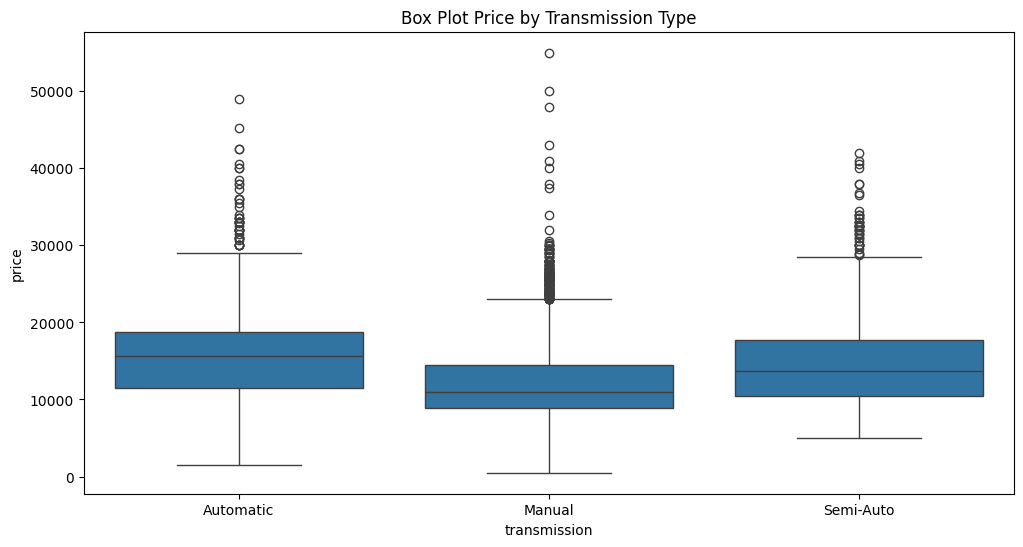

In [12]:
## EDA
# PROMPT 5: Write a Python code that performs the following tasks:
#1.Creates a Box plot to determine of a categorical feature with 3 categories showing outliers. 
#2.Uses the seaborn library for creating the plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Specify categorical feature and target variable
categorical_column = 'transmission'
target_column = 'price'

# Plotting boxplot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=categorical_column, y=target_column, data=df)
ax.set_title('Box Plot Price by Transmission Type')
plt.show()


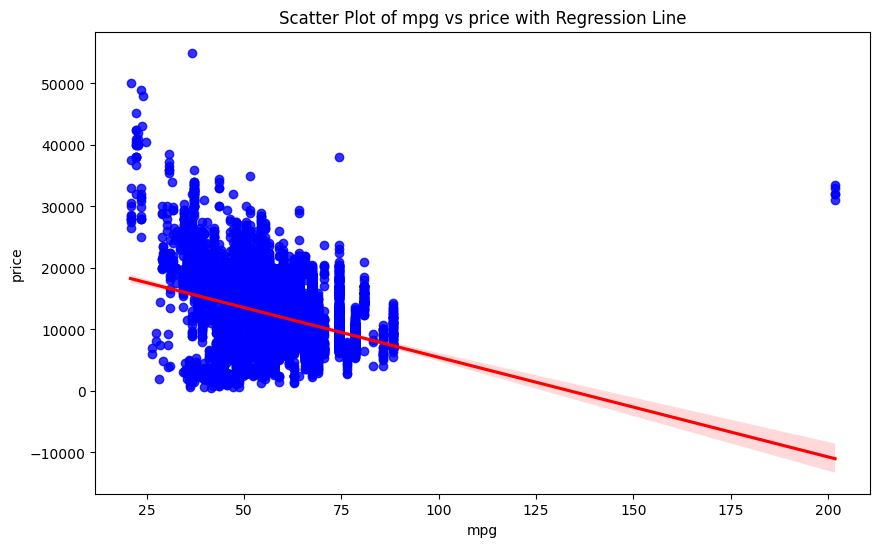

In [13]:
## EDA
# PROMPT 6: Write a Python code that performs the following task:
# Generate a scatter plot between a continuous feature and the target variable to show correlation with a trednline
# Scatter plot with trendline using seaborn's regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df, color='blue', line_kws={'color': 'red'})

# Adding labels and title
plt.title('Scatter Plot of mpg vs price with Regression Line')
plt.xlabel('mpg')
plt.ylabel('price')

# Display the plot
plt.show()

In [21]:
## Model Development and Evaluation
# PROMPT 7: Write a python code that performs the following tasks:
# 1. Fit a univariate linear regression model between a predictor and the target variable using LinearRegression(). 
#2. Calculate R squared and MSE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
X = df[['mpg']].values
y = df['price'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared for the linear regression model with 1 feature (mpg): {r_squared}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE) for the linear regression model with 1 feature (mpg): {mse}")

R-squared for the linear regression model with 1 feature (mpg): 0.1198980224962416
Mean Squared Error (MSE) for the linear regression model with 1 feature (mpg): 19741690.809446193


In [22]:
## Model Development and Evaluation
# PROMPT 8: Write a python code that performs the following tasks:
# 1. Fit a mulitvariate linear regression model between 5 predictors and the target variable using LinearRegression()
# 2. Calculate R squared and MSE

# Specify predictor and target column names
predictors = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_column = 'price'

# Prepare data for modeling
X = df[predictors]
y = df[target_column]

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared for the linear regression model with 5 predictors: {r_squared}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE) for the linear regression model with 5 predictors: {mse}")

R-squared for the linear regression model with 5 predictors: 0.7265379654547005
Mean Squared Error (MSE) for the linear regression model with 5 predictors: 6134065.224381731


In [24]:
## Model Development and Evaluation
# PROMPT 9: Write a python code that performs the following tasks given the 5 previous predictors:
# 1. Create a pipeline model object 
# 2. In the pipeline model object, apply StandardScaler, PolynomialFeatures and RegressionModel.
# 3. Calculate the R squared and MSE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Specify predictor and target column names
predictors = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_column = 'price'

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Step to standardize features
    ('poly', PolynomialFeatures(degree=2)),  # Step to apply polynomial features
    ('regressor', LinearRegression())  # Step to fit linear regression model
])

# Fit the pipeline
pipeline.fit(df[predictors], df[target_column])

# Predict values
y_pred = pipeline.predict(df[predictors])

# Calculate R-squared
r_squared = r2_score(df[target_column], y_pred)
print(f"R-squared for the pipeline: {r_squared}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df[target_column], y_pred)
print(f"Mean Squared Error (MSE) for the pipeline: {mse}")

R-squared for the pipeline: 0.7666619695239302
Mean Squared Error (MSE) for the pipeline: 5234038.06546274


In [25]:
## Model Development and Evaluation
# PROMPT 10: Write a python code that performs the following tasks given the 5 previous predictors:
# 1. Splits the data using train_test_split with test size = 0.2
# 2. Creates a Ridge regression object and fit on training data, using a regularization parameter of 0.1
# 3. Calculates the R squared on test data.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Specify predictor and target column names
predictors = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_column = 'price'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target_column], test_size=0.2, random_state=42)

# Create a Ridge regression object with regularization parameter alpha=0.1
ridge_reg = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(X_test)

# Calculate R-squared on the test data
r_squared = r2_score(y_test, y_pred)
print(f"R-squared for the Ridge model on test data: {r_squared}")


R-squared for the Ridge model on test data: 0.6917134446113138


In [27]:
## Model Development and Evaluation
# PROMPT 11: Write a python code that performs the following tasks given the 5 previous predictors:
# 1. Splits the data using train_test_split with test size = 0.2
# 2. Performs a second order polynomial transformation on training and test data.
# 2. Creates a Ridge regression object and fit on transformed training data, using alpha = 0.1
# 3. Calculates the R squared and MSE on transformed test data.

# Specify predictor and target column names
predictors = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_column = 'price'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target_column], test_size=0.2, random_state=42)

# Apply polynomial features transformation of degree 2 to both training and test data
poly = PolynomialFeatures(degree=2)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.transform(X_test)

# Create and fit a Ridge regression object with alpha=0.1
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train_transformed, y_train)

# Predict on the transformed test data
y_pred = ridge_reg.predict(X_test_transformed)

# Calculate R-squared on the transformed test data
r_squared = r2_score(y_test, y_pred)
print(f"R-squared for the Ridge model on transformed test data: {r_squared}")

# Calculate Mean Squared Error (MSE) on the transformed test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) for the Ridge model on transformed test data: {mse}")


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R-squared for the Ridge model on transformed test data: 0.6732748888228912
Mean Squared Error (MSE) for the Ridge model on transformed test data: 7326174.516559619


In [32]:
## Model Development and Evaluation
# PROMPT 12: Write a python code that can perform the following tasks.
# 1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
# 2. Apply second degree polynomial scaling to the training and testing data.
# 3. Create and fit a Grid search on Ridge regression with cross validation = 4 using the training data, for a set of values of the parameter alpha.
# 4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

from sklearn.model_selection import GridSearchCV

# Specify predictor and target column names
predictors = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_column = 'price'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target_column], test_size=0.2, random_state=42)

# Step 4: Apply polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 5: Setup and fit GridSearchCV for Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=4)
grid_search.fit(X_train_poly, y_train)

# Step 6: Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Optimal alpha: {best_alpha}")

# Step 7: Fit Ridge Regression model with the best alpha
ridge_model_best = Ridge(alpha=best_alpha)
ridge_model_best.fit(X_train_poly, y_train)

# Step 8: Predict on the test set
y_pred = ridge_model_best.predict(X_test_poly)

# Step 9: Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.0567e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.98143e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.10209e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.85743e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.9414e-24): resul

Optimal alpha: 0.01


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.27922e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE: 13840985.11755802
R^2: 0.38273414165699104
